# 6.5 Machine Learning Part 2
### This script contains the following:
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns 

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [23]:
%matplotlib inline

In [24]:
# Folder location string
path = r'C:\Users\nurgul\Linkedin'

In [25]:
# Importing cleaned dataset
df = pd.read_csv('jobs_posts_clean_onlyUS_v2.csv', index_col=False)

In [26]:
df.shape

(6996, 19)

In [27]:
df.head()

,job_id,company_id,title,work_type,location,applies,views,experience_level,listed_time,approx_salary,name,company_size,state,country,zip_code,skill_abr,salary_category,applies_category,industry
0,3757935001,73013724,Sales Manager,Full-time,"Coeur d'Alene, ID",18.329151,66.426309,Mid-Senior level,2023-11-04 06:40:00,237500.0,J. Galt,3.000000,Indiana,US,46268,SALE,high,medium,Financial Services
1,3757934319,18391435,Controls Engineer,Full-time,"Orlando, FL",1.000000,5.000000,Mid-Senior level,2023-11-04 06:40:00,135500.0,head-huntress.com,4.537178,CA,US,92025,ENG,high,low,Staffing and Recruiting
2,3757934318,6577380,CDL Class B Driver,Full-time,"Oakland, CA",15.568389,56.874644,Mid-Senior level,2023-11-04 06:40:00,26.0,Conexwest,2.000000,California,US,94607,MGMT,low,medium,Retail Office Equipment
3,3757934267,28352,CDL A Delivery Driver,Full-time,"Swedesboro, NJ",15.568389,56.874644,Entry level,2023-11-04 06:40:00,95000.0,Core-Mark International,6.000000,Texas,US,76262,MGMT,medium,medium,Wholesale
4,3757934264,73013724,Sales Manager,Full-time,"Richmond, VA",18.329151,66.426309,Mid-Senior level,2023-11-04 06:40:00,237500.0,J. Galt,3.000000,Indiana,US,46268,SALE,high,medium,Financial Services


In [28]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows (if any)
print("Duplicate Rows:")
print(duplicates)

# Drop duplicate rows and keep the first occurrence
df.drop_duplicates(inplace=True)


Duplicate Rows:
Empty DataFrame
Columns: [job_id, company_id, title, work_type, location, applies, views, experience_level, listed_time, approx_salary, name, company_size, state, country, zip_code, skill_abr, salary_category, applies_category, industry]
Index: []


In [29]:
# Create a subset 

sub = df[['applies', 'views', 'approx_salary', 'company_size']]

### 2. The elbow technique 

In [30]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [31]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

/Users/nurgul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nurgul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nurgul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nurgul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[-34399544271251.383,
 -11459485106474.975,
 -4937163405843.998,
 -2709323768677.7505,
 -1714594761636.302,
 -1180698254127.3071,
 -866614509445.4368,
 -666304063558.5786,
 -506762602928.1571]

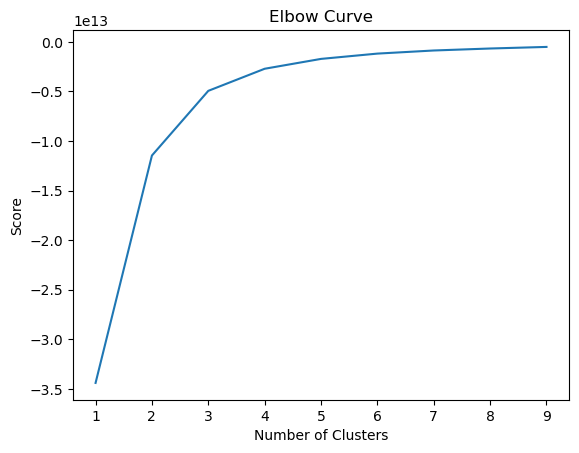

In [32]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from two to 3 on the x-axis, but after that, the curve slighltly goews till four and straightens out. I decided to choose 3 as an optimal count for my clusters. 

### 3. k-means clustering

In [33]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [34]:
# Fit the k-means object to the data

kmeans.fit(sub)

/Users/nurgul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [35]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column

sub['clusters'] = kmeans.fit_predict(sub)

/Users/nurgul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/b1/dcgm49cs1dx0p3lkf95fklvr0000gp/T/ipykernel_72177/1587882893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [36]:
sub.head()

,applies,views,approx_salary,company_size,clusters
0,18.329151,66.426309,237500.0,3.000000,2
1,1.000000,5.000000,135500.0,4.537178,0
2,15.568389,56.874644,26.0,2.000000,1
3,15.568389,56.874644,95000.0,6.000000,0
4,18.329151,66.426309,237500.0,3.000000,2


In [37]:
# Check the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

clusters
0    3106
1    2723
2    1167
Name: count, dtype: int64

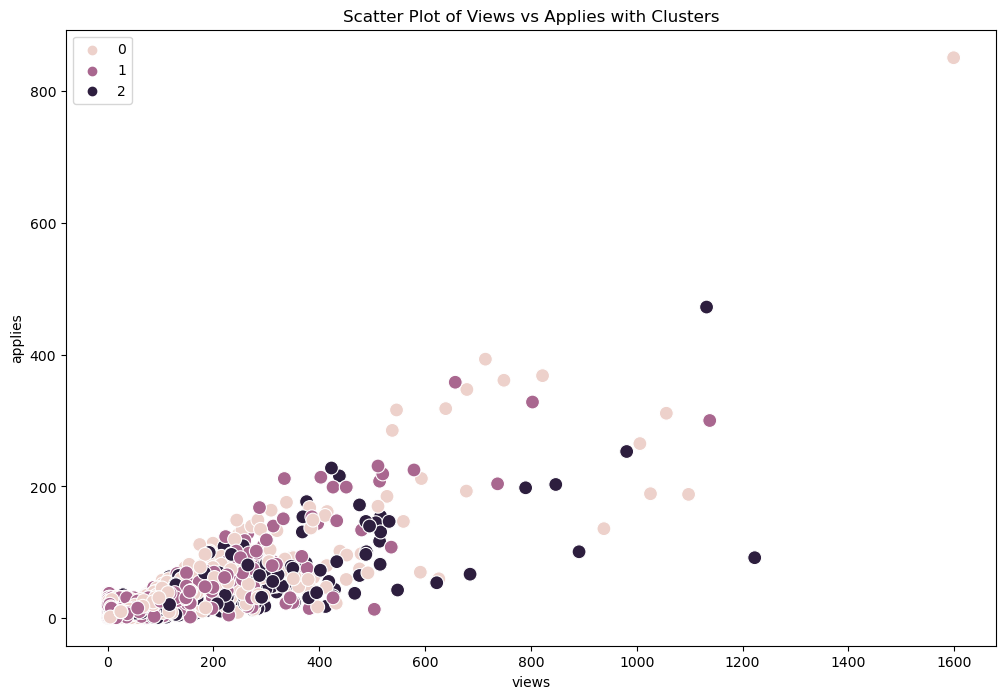

In [38]:
# Plot the clusters for the "Views" and "applies" variables
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=sub['views'], y=sub['applies'] , hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('views')
plt.ylabel('applies')
plt.title('Scatter Plot of Views vs Applies with Clusters')
plt.show()

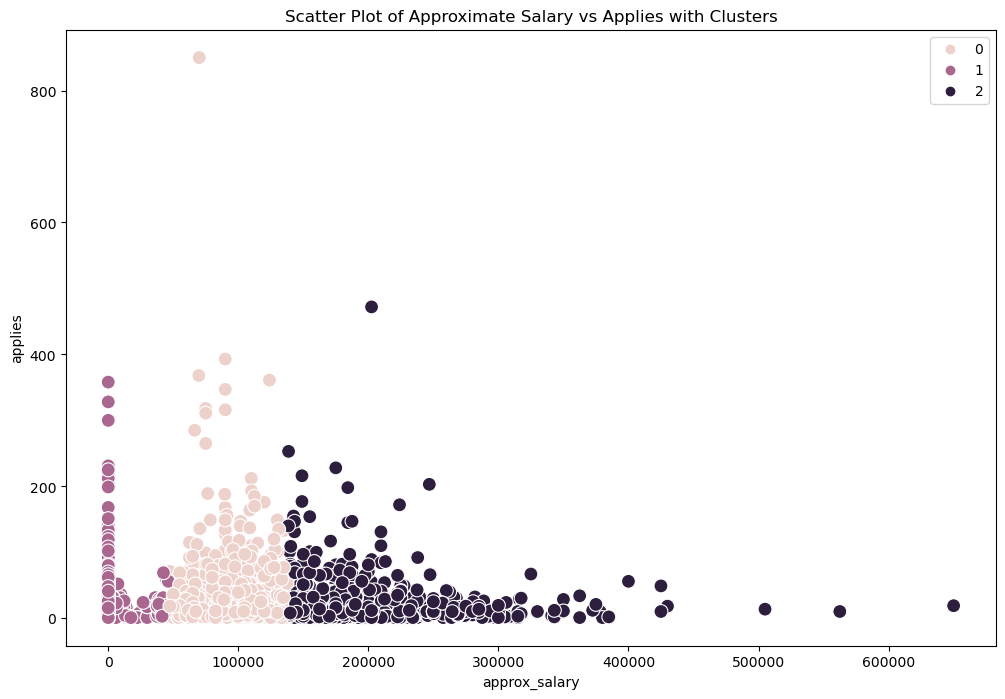

In [39]:
# Plot the clusters for the "Approximate salary" and "applies" variables
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=sub['approx_salary'], y=sub['applies'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('approx_salary')
plt.ylabel('applies')
plt.title('Scatter Plot of Approximate Salary vs Applies with Clusters')
plt.show()

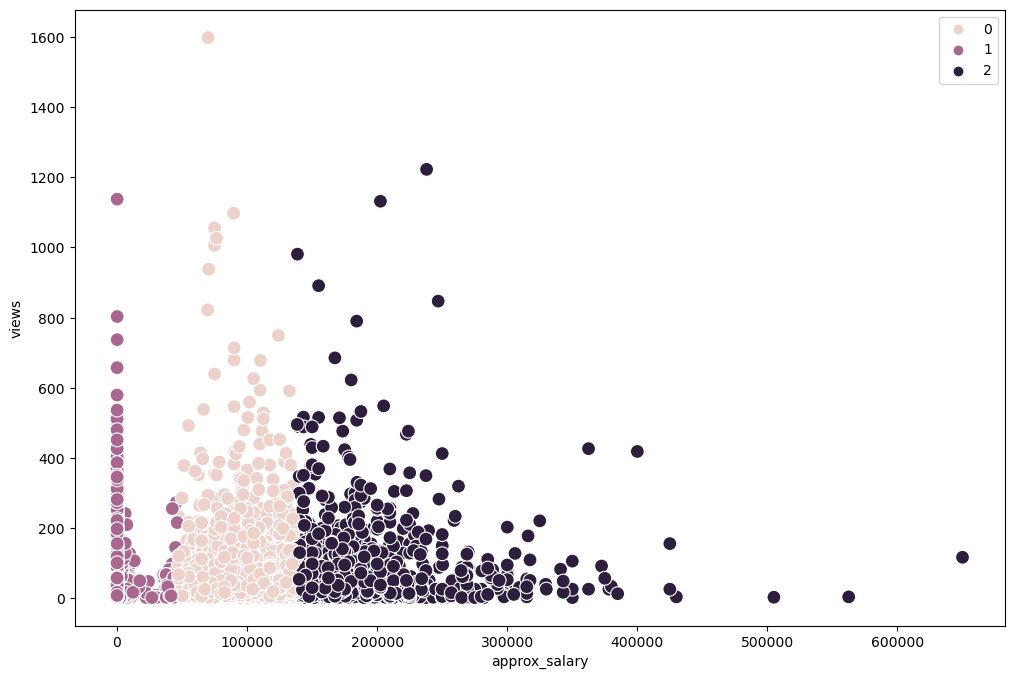

In [40]:
# Plot the clusters for the "Approximate salary" and "views" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x=sub['approx_salary'], y = sub['views'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('approx_salary')
plt.ylabel('views')
plt.show()

#### Conlcusion  

The black cluster appears to have a higher level of engagement, both in terms of views and applications, along with a relatively high salary.
The pink cluster has lower engagement, fewer views, and a notably lower average salary.
The purple cluster falls in between, with moderate engagement, higher views, and a mid-range average salary.


In [41]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'black'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/b1/dcgm49cs1dx0p3lkf95fklvr0000gp/T/ipykernel_72177/3896430793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'black'


In [42]:
sub.groupby('cluster').agg({'applies':['mean', 'median'], 
                         'views':['mean', 'median'], 
                         'approx_salary':['mean', 'median']}) 

applies                 views             approx_salary          
              mean     median       mean     median           mean    median
cluster                                                                     
black    19.217643  13.606557  76.357847  40.000000  185455.457048  172500.0
pink     16.891679  12.000000  51.232978  25.015066   90968.026708   90000.0
purple   16.135149  13.761553  44.992617  25.015066    2051.166519      30.0

In the black cluster, job postings have, on average, approximately 19.22 applications, with a median of 13.61. The number of views is higher, with a mean of 76.36 and a median of 40.00. Additionally, the approximate salary for this cluster has a mean of 185,455.46 USD and a median of 172,500.00 USD.

In the pink cluster, job postings receive an average of approximately 16.14 applications, with a median of 13.76. The number of views is lower, with a mean of 44.99 and a median of 25.02. The approximate salary for this cluster has a mean of 2,051.17 USD and a median of 30.00 USD.

In the purple cluster, job postings receive an average of approximately 16.89 applications, with a median of 12.00. The number of views is higher, with a mean of 51.23 and a median of 25.02. The approximate salary for this cluster has a mean of 90,968.03 USD and a median of 90,000.00 USD.

### Further Analysis  

The analysis shows useful insights for future steps in marketing and improving job postings. The clusters represent different types of job posts based on applications, views, and salary. To improve marketing, tailor strategies for each cluster. For example, highlight attractive features for the black cluster and focus on increasing visibility for the pink cluster.
In terms of content, understanding what makes job posts more engaging is crucial. Analyzing the black cluster can reveal key features that attract more attention. Using these insights to make future job posts more appealing to job seekers. This continuous improvement helps create more effective and engaging job listings.